In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gradio as gr

In [ ]:
!pip install pyspark
from functools import reduce
from pyspark.sql import SparkSession

# Create or retrieve Spark session with updated configuration
spark = SparkSession.builder \
    .appName("AnomalyDetection") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.memory.fraction", "0.8") \
    .getOrCreate()

# List of file paths in Google Drive
file_paths = ['/content/drive/MyDrive/Colab Notebooks/data_bigdata (1)/data_test/UNSW-NB15_1.csv',
              '/content/drive/MyDrive/Colab Notebooks/data_bigdata (1)/data_test/UNSW-NB15_2.csv',
              '/content/drive/MyDrive/Colab Notebooks/data_bigdata (1)/data_test/UNSW-NB15_3.csv',
              '/content/drive/MyDrive/Colab Notebooks/data_bigdata (1)/data_test/UNSW-NB15_4.csv']

# Read CSV files into PySpark DataFrames
#dfs = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine PySpark DataFrames
#combined_df = reduce(lambda df1, df2: df1.union(df2), dfs)


In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, TimestampType, BinaryType

# Define the schema for your DataFrame
# Define the schema for your DataFrame
schema = StructType([
    StructField("srcip", StringType(), True),
    StructField("sport", IntegerType(), True),
    StructField("dstip", StringType(), True),
    StructField("dsport", IntegerType(), True),
    StructField("proto", StringType(), True),
    StructField("state", StringType(), True),
    StructField("dur", FloatType(), True),
    StructField("sbytes", IntegerType(), True),
    StructField("dbytes", IntegerType(), True),
    StructField("sttl", IntegerType(), True),
    StructField("dttl", IntegerType(), True),
    StructField("sloss", IntegerType(), True),
    StructField("dloss", IntegerType(), True),
    StructField("service", StringType(), True),
    StructField("Sload", FloatType(), True),
    StructField("Dload", FloatType(), True),
    StructField("Spkts", IntegerType(), True),
    StructField("Dpkts", IntegerType(), True),
    StructField("swin", IntegerType(), True),
    StructField("dwin", IntegerType(), True),
    StructField("stcpb", IntegerType(), True),
    StructField("dtcpb", IntegerType(), True),
    StructField("smeansz", IntegerType(), True),
    StructField("dmeansz", IntegerType(), True),
    StructField("trans_depth", IntegerType(), True),
    StructField("res_bdy_len", IntegerType(), True),
    StructField("Sjit", FloatType(), True),
    StructField("Djit", FloatType(), True),
    StructField("Stime", TimestampType(), True),
    StructField("Ltime", TimestampType(), True),
    StructField("Sintpkt", FloatType(), True),
    StructField("Dintpkt", FloatType(), True),
    StructField("tcprtt", FloatType(), True),
    StructField("synack", FloatType(), True),
    StructField("ackdat", FloatType(), True),
    StructField("is_sm_ips_ports", IntegerType(), True),  # Convert to IntegerType()
    StructField("ct_state_ttl", IntegerType(), True),
    StructField("ct_flw_http_mthd", IntegerType(), True),
    StructField("is_ftp_login", IntegerType(), True),  # Convert to IntegerType()
    StructField("ct_ftp_cmd", IntegerType(), True),
    StructField("ct_srv_src", IntegerType(), True),
    StructField("ct_srv_dst", IntegerType(), True),
    StructField("ct_dst_ltm", IntegerType(), True),
    StructField("ct_src_ltm", IntegerType(), True),
    StructField("ct_src_dport_ltm", IntegerType(), True),
    StructField("ct_dst_sport_ltm", IntegerType(), True),
    StructField("ct_dst_src_ltm", IntegerType(), True),
    StructField("attack_cat", StringType(), True),
    StructField("Label", IntegerType(), True)
])


# Read CSV files with the specified schema
dfs = [spark.read.csv(file_path, header=True, schema=schema) for file_path in file_paths]

# Combine PySpark DataFrames
combined_df = reduce(lambda df1, df2: df1.union(df2), dfs)

# Show the combined DataFrame
combined_df.show()


+------------+-----+--------------+------+-----+-----+--------+------+------+----+----+-----+-----+-------+------------+---------+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+--------+---------+-----+-----+--------+--------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|       srcip|sport|         dstip|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|       Sload|    Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|    Sjit|     Djit|Stime|Ltime| Sintpkt| Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+------------+-----+--------------+------+-----+-----+--------+------+------+----+----+---

In [ ]:
combined_df.printSchema()


root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: float (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: float (nullable = true)
 |-- Dload: float (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: integer (nullable = true)
 |-- dtcpb: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'proto_counts_df' contains your protocol counts DataFrame
plt.figure(figsize=(12, 8))

# Create the bar plot with rotated x-axis labels
plt.bar(proto_counts_df['proto'], proto_counts_df['count'])
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Distribution of Protocols')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

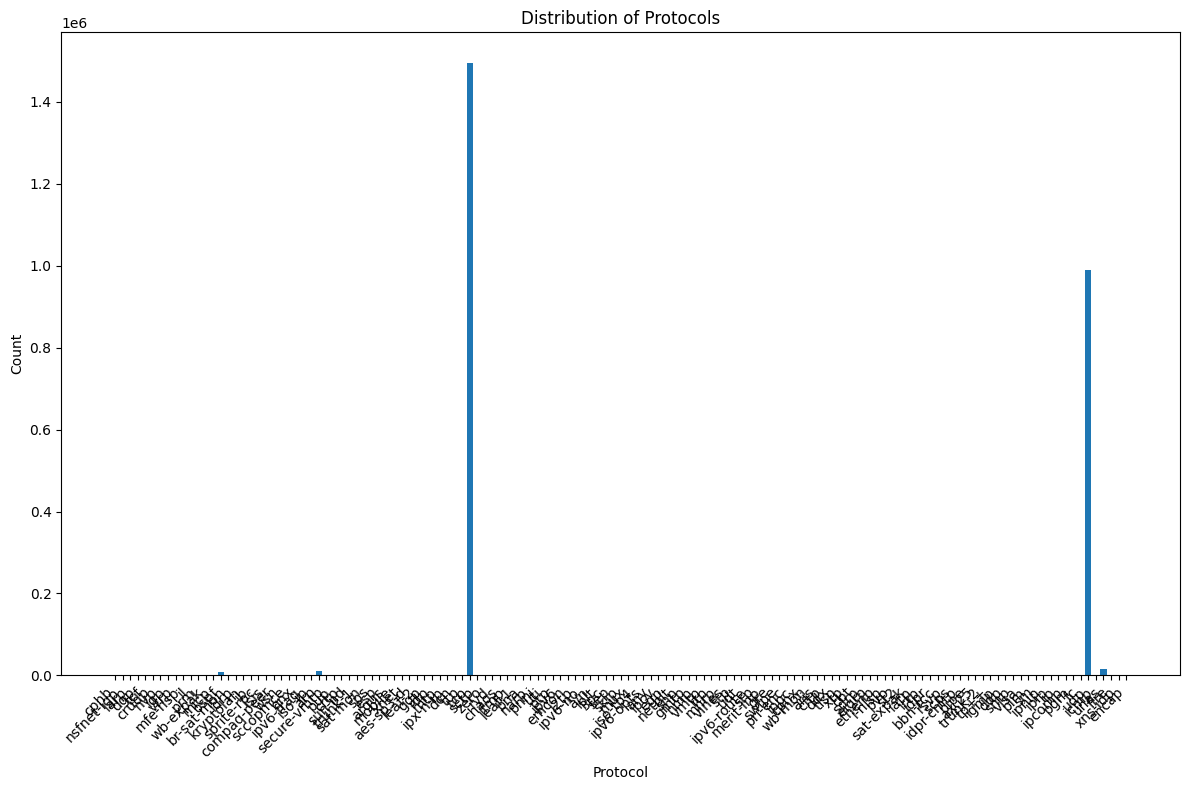

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'attack_cat_counts' is a PySpark DataFrame with 'attack_cat' and 'count' columns
# Convert to Pandas DataFrame for visualization
attack_cat_counts_df = attack_cat_counts.toPandas()

# Plotting the distribution of 'attack_cat' categories using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(attack_cat_counts_df['attack_cat'].astype(str), attack_cat_counts_df['count'], color='skyblue')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


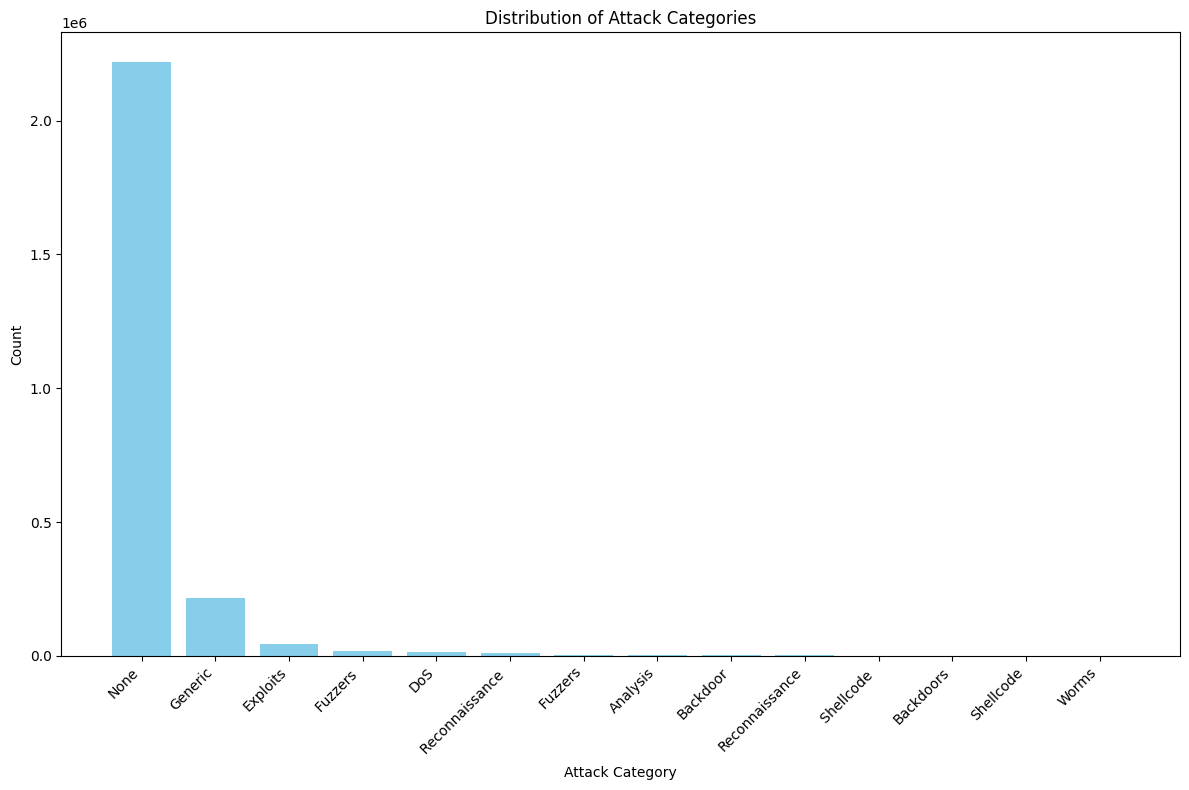

In [ ]:
from pyspark.sql.functions import mean, when

# Define numerical and categorical columns
numerical_columns = [
    'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload',
    'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz',
    'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt',
    'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
    'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
    'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
    'ct_dst_sport_ltm', 'ct_dst_src_ltm','Label'
]

categorical_columns = ['proto', 'state', 'service','attack_cat']

# Fill null values for numerical columns with mean
mean_values = combined_df.select([mean(col).alias(col) for col in numerical_columns]).collect()[0].asDict()
filled_numerical_df = combined_df.fillna(mean_values)

# Fill null values for categorical columns with mode
mode_values = {col: combined_df.groupBy(col).count().orderBy('count', ascending=False).first()[col] for col in categorical_columns}
filled_categorical_df = filled_numerical_df
for col, mode_val in mode_values.items():
    filled_categorical_df = filled_categorical_df.withColumn(col, when(filled_categorical_df[col].isNull(), mode_val).otherwise(filled_categorical_df[col]))

# Display the cleaned DataFrame
filled_categorical_df.show(5)


+----------+-----+-------------+------+-----+-----+--------+------+------+----+----+-----+-----+-------+---------+---------+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+--------+---------+-----+-----+-------+--------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|    Sjit|     Djit|Stime|Ltime|Sintpkt| Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+----------+-----+-------------+------+-----+-----+--------+------+------+----+----+-----+-----+-------+

In [ ]:
from pyspark.ml.feature import StringIndexer

# Define StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=col + '_index', handleInvalid='keep') for col in categorical_columns]

# Fit and transform the indexers on the DataFrame
indexed_df = filled_categorical_df
for indexer in indexers:
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)

# Drop original categorical columns (after indexing)
indexed_df = indexed_df.drop(*categorical_columns)

# Display the transformed DataFrame
indexed_df.show(5)


+----------+-----+-------------+------+--------+------+------+----+----+-----+-----+---------+---------+-----+-----+----+----+-----+-----+-------+-------+-----------+-----------+--------+---------+-----+-----+-------+--------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+-----+-----------+-----------+-------------+----------------+
|     srcip|sport|        dstip|dsport|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss|    Sload|    Dload|Spkts|Dpkts|swin|dwin|stcpb|dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|    Sjit|     Djit|Stime|Ltime|Sintpkt| Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|Label|proto_index|state_index|service_index|attack_cat_index|
+----------+-----+-------------+------+--------+------+-

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Define the feature columns to be assembled
feature_columns = numerical_columns + [col + '_index' for col in categorical_columns]

# Create VectorAssembler to assemble feature columns into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Apply VectorAssembler to the DataFrame
assembled_df = assembler.transform(indexed_df)

assembled_df.printSchema()
assembled_df.show(5)  # Try showing a smaller number of rows


root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- dur: float (nullable = false)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- Sload: float (nullable = false)
 |-- Dload: float (nullable = false)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: integer (nullable = true)
 |-- dtcpb: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- Sjit: float (nullable = false)
 |-- Djit: float (nullable = false)
 |-- Stime: timestamp (nullable = true)
 

In [ ]:
# Select and show the attack category index and label columns
assembled_df.select("attack_cat_index", "Label").show(5)


+----------------+-----+
|attack_cat_index|Label|
+----------------+-----+
|            13.0|    0|
|            13.0|    0|
|            13.0|    0|
|            13.0|    0|
|            13.0|    0|
+----------------+-----+
only showing top 5 rows



In [ ]:
# Select the required output features along with 'features' for model training
final_data = assembled_df.select('features', 'Label', 'attack_cat_index')

# Split the data into training and test sets (70% train, 30% test)
train_ratio = 0.7
test_ratio = 1 - train_ratio
seed = 42  # Set a seed for reproducibility

train_data, test_data = final_data.randomSplit([train_ratio, test_ratio], seed=seed)

# Display the number of records in each set
print("Number of records in training set: {}".format(train_data.count()))
print("Number of records in test set: {}".format(test_data.count()))

In [ ]:
train_data.describe().show()

In [ ]:
test_data.describe().show()

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Create a RandomForestClassifier model with adjusted maxBins
rf = RandomForestClassifier(featuresCol='features', labelCol='Label', maxBins=200)

# Train the model
rf_model = rf.fit(train_data)

# Make predictions on test data
predictions = rf_model.transform(test_data)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
# Evaluate model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='accuracy')

# Compute accuracy
test_accuracy = evaluator.evaluate(predictions)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0


In [ ]:

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='accuracy')

# Define the parameter grid for tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [5, 10]) \
    .addGrid(rf.numTrees, [50, 100]) \
    .build()

# Create CrossValidator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # Use a different number of folds as needed

# Fit CrossValidator
cv_model = crossval.fit(train_data)

# Make predictions on test data
predictions = cv_model.transform(test_data)

# Evaluate model using MulticlassClassificationEvaluator
test_accuracy = evaluator.evaluate(predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.978520095348

In [ ]:
#from pyspark.ml import PipelineModel

# Define the path to save the trained model
rf_model_path = "/content/drive/MyDrive/Colab Notebooks/rf_model"

# Save the trained RandomForestClassifier model to disk
rf_model.save(rf_model_path)


In [ ]:
# Save the trained RandomForestClassifier model to disk, overwriting if it already exists
rf_model.write().overwrite().save(rf_model_path)


In [ ]:
# Calculate precision and recall
tp = predictions.filter("prediction = 1 AND Label = 1").count()
fp = predictions.filter("prediction = 1 AND Label = 0").count()
tn = predictions.filter("prediction = 0 AND Label = 0").count()
fn = predictions.filter("prediction = 0 AND Label = 1").count()

precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0.0

print("Test Precision:", precision)
print("Test Recall:", recall)

Test Precision: 0.99119675159

Test Recall: 0.969667911529541

In [ ]:
loaded_rf_model = RandomForestClassificationModel.load(rf_model_path)

In [ ]:
!pip install gradio

In [ ]:
from pyspark.ml.feature import VectorAssembler
import pandas as pd

def predict_attack(features):
    # Create a DataFrame from input features dictionary
    input_df = pd.DataFrame([features])

    # Create a Spark DataFrame from the input data
    spark_df = spark.createDataFrame(input_df)

    # Define feature columns
    feature_columns = [
        'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload',
        'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz',
        'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt',
        'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
        'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
        'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
        'ct_dst_sport_ltm'
    ]

    # Assemble features into a single feature vector
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
    assembled_df = assembler.transform(spark_df)

    # Make predictions using the loaded RandomForestClassifier model
    predictions = loaded_rf_model.transform(assembled_df)

    # Extract the predicted label
    predicted_label = predictions.select('prediction').collect()[0][0]

    # Map the predicted label to the corresponding attack category
    attack_categories = ["Normal", "DoS", "Probe", "R2L", "U2R"]
    predicted_category = attack_categories[int(predicted_label)]

    return predicted_category


In [ ]:
import gradio as gr

# Define input components based on feature columns
input_components = []
for column in feature_columns:
    input_components.append(gr.Textbox(label=column))

# Define the output component
output_component = gr.Textbox(label="Predicted Attack Category")

# Create Gradio interface
gr.Interface(fn=predict_attack, inputs=input_components, outputs=output_component, title='Attack Prediction').launch()


/usr/local/lib/python3.10/dist-packages/gradio/utils.py:977: UserWarning: Expected 1 arguments for function <function predict_attack at 0x7d729d849990>, received 43.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:985: UserWarning: Expected maximum 1 arguments for function <function predict_attack at 0x7d729d849990>, received 43.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://905c69c7bd7dfc421e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
spark.stop()